# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>

</ul>

<a id='intro'></a>

## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

want to find answer to this questions:

1- Which genre gets highest popularity in average?
<br>
2- Which genres are most popular from year to year? 
<br>
3- Which genre gets highest revenue?
<br>
4- Which genre gets highest in average?
<br>
5- What year did the largest number of films take place? 


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
sns.set(style="ticks", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [330]:
#I want to number each plot so I will write function to return each plot number 
con = 0
def get_figure_no():
    global con
    con += 1
    return con

In [331]:
df = pd.read_csv('tmdb-movies.csv')

In [332]:
df.head()
#df.shape

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Chcking if there is null values or not

In [333]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### I found rows that have null values so I will drop it 

In [334]:
df.dropna(inplace=True)

### I check agin to see the edit

In [335]:
df.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### I found rows with revenue equal zero and budget equal zero which not make sense so I drop there

In [336]:
df = df[df['revenue'] != 0]
df = df[df['budget'] != 0]
#df.dropna(inplace=True)

### Checking if rows with zero values in budget and revenue are removed or not

In [337]:
df[df['revenue'] == 0], df[df['budget'] == 0]

(Empty DataFrame
 Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
 Index: []
 
 [0 rows x 21 columns], Empty DataFrame
 Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
 Index: []
 
 [0 rows x 21 columns])

### I found that each movie have different genre types with "|" between them which make analysis more diffecult because I want to deal with each genre type sperately so I edit genres values which countains "|" and separate each one in specific row

### Spliting Data from genres into separate rows to make comparison between each genre type easy

This code help me to do this: https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row [1]

In [338]:

# i get the code below from this website: https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row
# separating each genre value in genre column into sperate rows
reshaped = \
(df.set_index(df.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df.columns]
)

#reshaped.head()

In [339]:
#Take a look at the data after spriting genres values
reshaped.genres.unique()
reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 21 columns):
id                      3454 non-null int64
imdb_id                 3454 non-null object
popularity              3454 non-null float64
budget                  3454 non-null int64
revenue                 3454 non-null int64
original_title          3454 non-null object
cast                    3454 non-null object
homepage                3454 non-null object
director                3454 non-null object
tagline                 3454 non-null object
keywords                3454 non-null object
overview                3454 non-null object
runtime                 3454 non-null int64
genres                  3454 non-null object
production_companies    3454 non-null object
release_date            3454 non-null object
vote_count              3454 non-null int64
vote_average            3454 non-null float64
release_year            3454 non-null int64
budget_adj              3454 non-null floa

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genre gets highest popularity in average?

In [340]:
w = reshaped.groupby('genres')['popularity'].mean() # clalculate average of popularity for each genre
w.index[w.values.argmax()] # geting genre with highest popularity


'Science Fiction'

Text(0, 0.5, 'Popularity in Average')

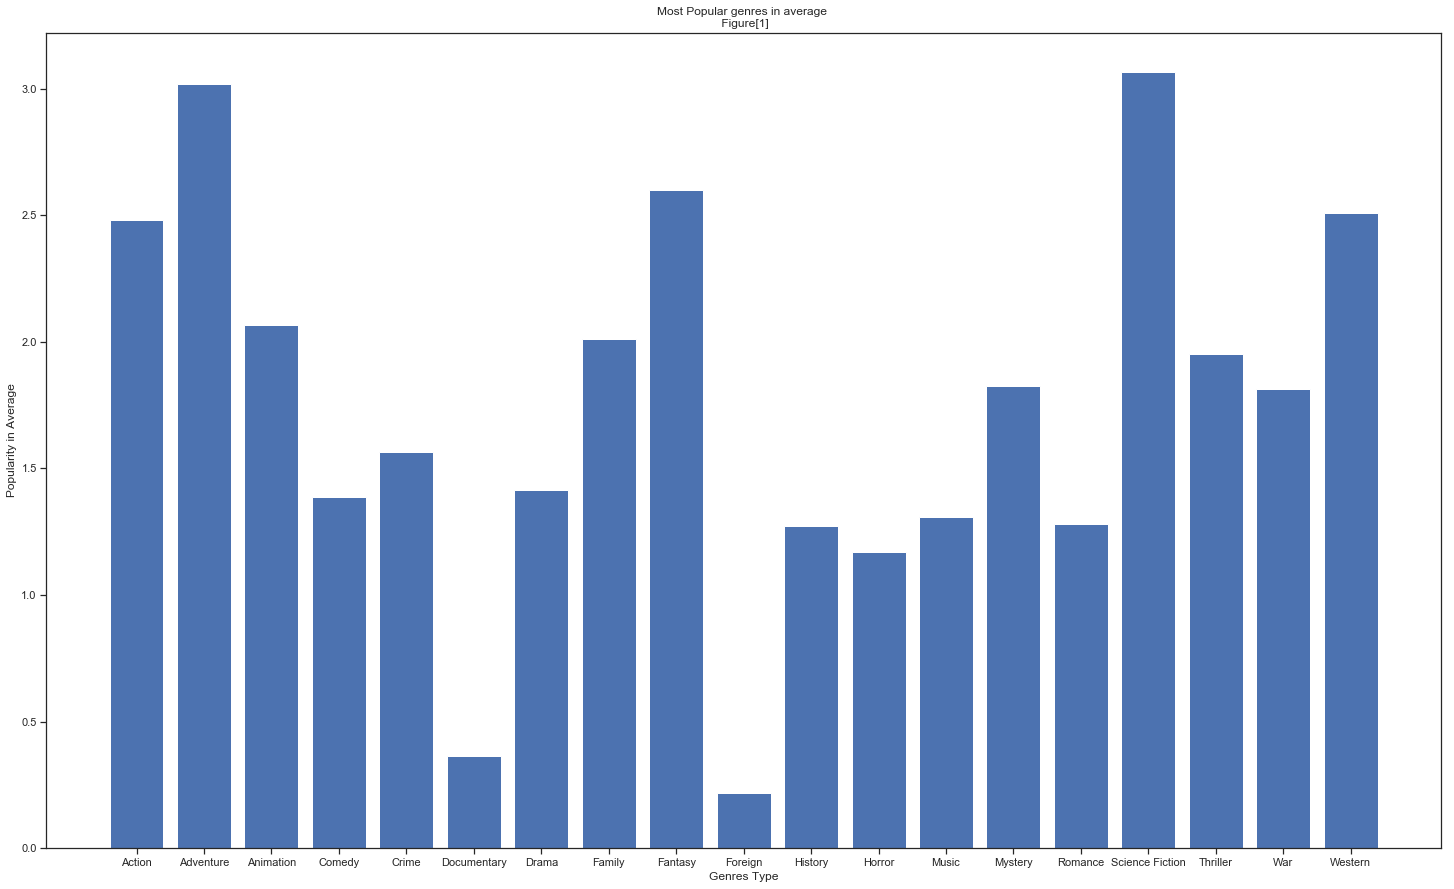

In [341]:
# representing value of popularity for each genre in bar chart 
plt.subplots(figsize=(25, 15))
plt.bar(w.index, w) # w.index represents genres while w represents value of popularity
plt.title('Most Popular genres in average \n Figure[{}]'.format(get_figure_no()))
plt.xlabel('Genres Type')
plt.ylabel('Popularity in Average')

#### The previous bar chart in Figure[1] represents genres with popularity and  we can see that science fiction is the most popular genre

### Research Question 2 : Which genres are most popular from year to year? 

In [342]:
genres_with_year = reshaped.groupby(['genres', 'release_year']).sum().reset_index() # grouping by genres and years to represent them in scatter plot and line plot
genres = reshaped.genres.unique() # here geting vlaues of genres to represent each value in scatter plot


#### I get the code which I wrote in the function below from here: https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas

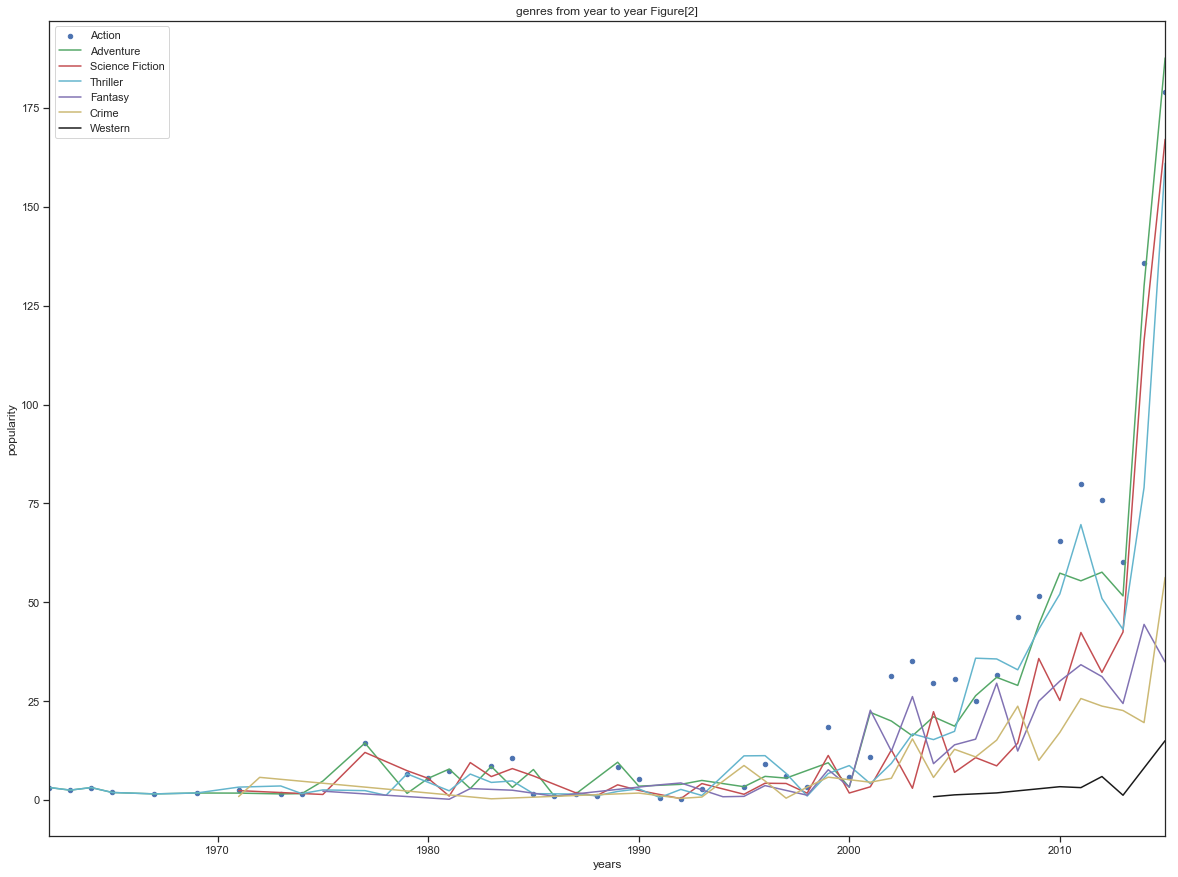

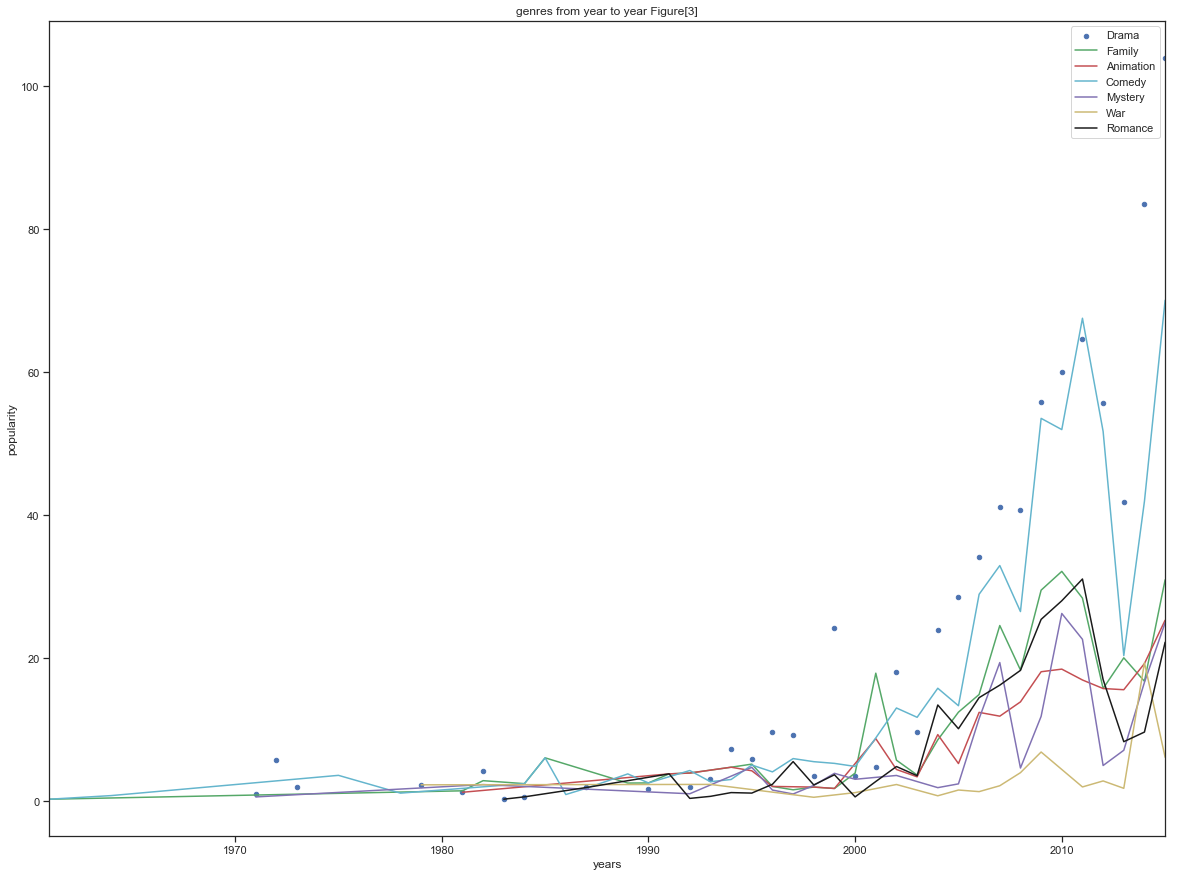

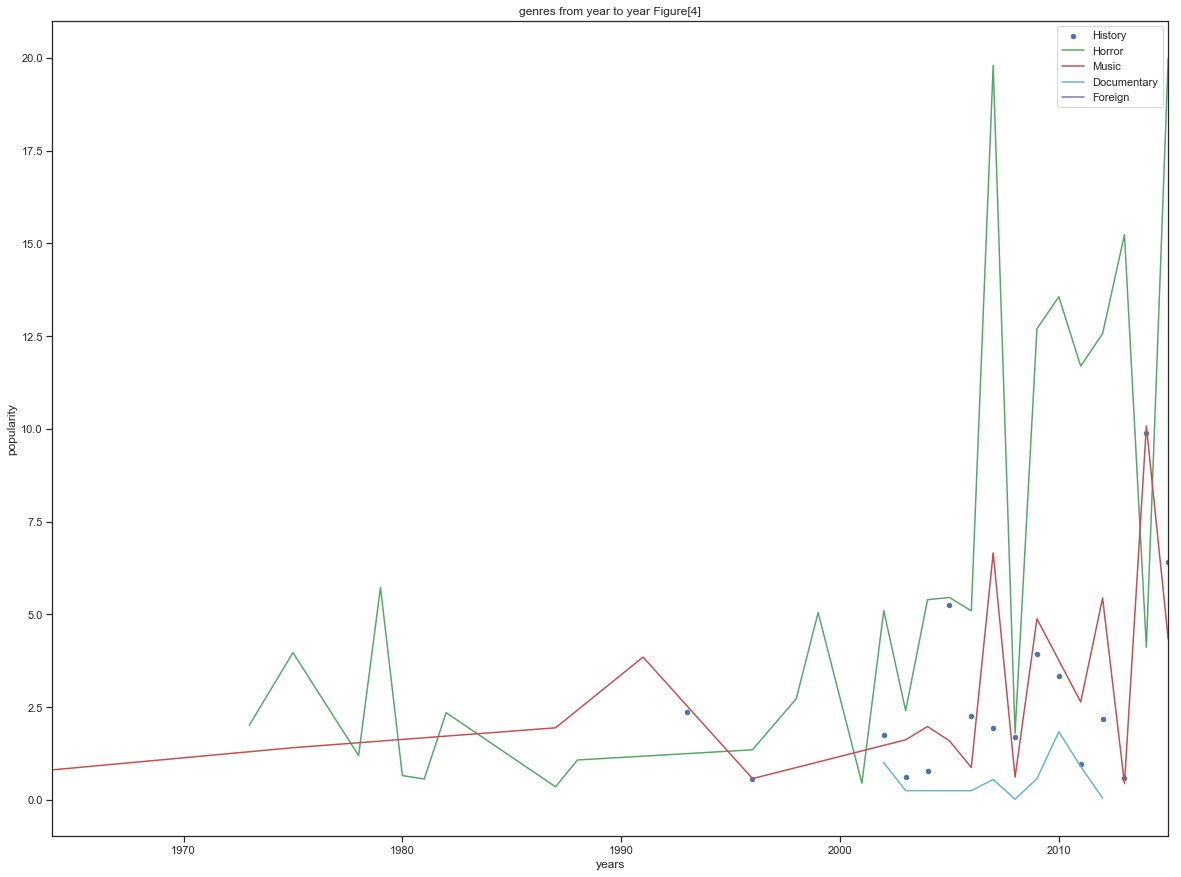

In [343]:
# here I write function to a scatter plot for a given array 
def plot(genres):
        plots = []
        for genre in genres:
            plots.append(genres_with_year[genres_with_year['genres'] == '{}'.format(genre)])
        ax0 = plots[0].plot(figsize=(20, 15), kind="scatter", x='release_year',y='popularity', color="b", label=genres[0])
        #colors = ['b', 'r', 'g', 'y']

        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

        for i in range(1, len(plots)):
            plots[i].plot(x='release_year',y='popularity', color= '{}'.format(colors[i]), label="{}".format(genres[i]), ax=ax0)
        ax0.set_title("genres from year to year Figure[{}]".format(get_figure_no()))
        ax0.set_xlabel("years")
        ax0.set_ylabel("popularity")

#here I split genres to 3 groups to make visualization more clear 
plot(genres[:7]) # for first 7 genres
plot(genres[7:14])# for next first 7 genres
plot(genres[14:20]) # for the last 6 genres


#### From previous 3 plots (Figure[2], Figure[3], Figure[4]) we can say that 'Action', 'Adventure', 'Science Fiction', 'Thriller' And 'Fantasy' are most popular from year to year

### Research Question 3 : Which genre gets highest revenue ? 

Text(0, 0.5, 'revenue')

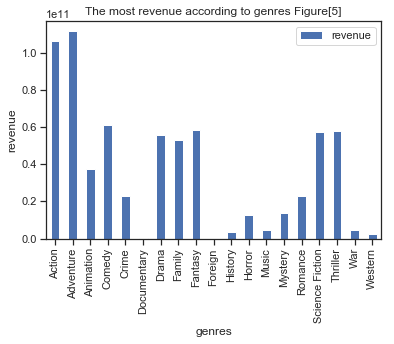

In [344]:
genres_with_revenue = reshaped.groupby(['genres']).sum().reset_index() #summing revenue of each genre
#genres_with_revenue
# drawing bar chart to represent each genre revenue
ax = genres_with_revenue.plot(title='The most revenue according to genres Figure[{}]'.format(get_figure_no()), kind='bar', x='genres', y='revenue')
ax.set_xlabel('genres')
ax.set_ylabel('revenue')

#### In previous plot (Figure[5]) we see that Adventure gets the highest revenue

### Research Question 4:  Which genre gets highest revenue in average? 

Text(0, 0.5, 'Increase in Average Of Revenue')

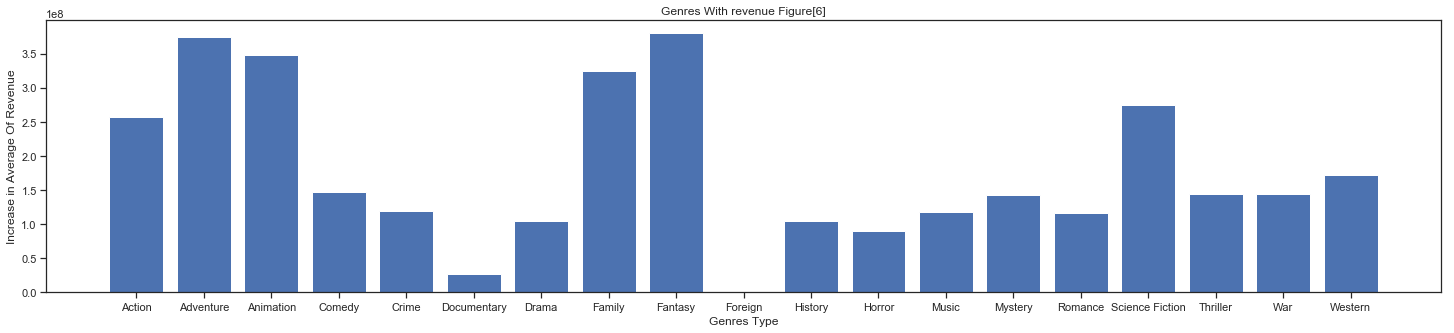

In [345]:
vv = reshaped.groupby(['genres']).mean()['revenue'] # calculating each genre revenue in average 

# represent each genre revenue in a bar chart
plt.subplots(figsize=(25, 5))
plt.bar(vv.index,vv)
plt.title('Genres With revenue Figure[{}]'.format(get_figure_no()))
plt.xlabel('Genres Type')
plt.ylabel('Increase in Average Of Revenue')

#### In previous plot(Figure [6]) we can see that Fantasy get the highest revenue in average

In [346]:
reshaped.groupby(['genres']).mean()['revenue'].idxmax() # here I check again for highest revenue in average

'Fantasy'

### Research Question 5 : What year did the largest number of films take place? 

In [347]:
reshaped['release_year'].value_counts().idxmax() # geting the largest year which has the largest number of movies 

2011

Text(0, 0.5, 'number of movies')

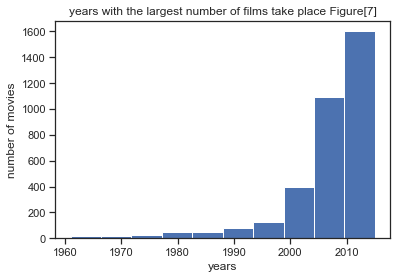

In [348]:
ax = reshaped['release_year'].plot(kind="hist", title="years with the largest number of films take place Figure[{}]".format(get_figure_no()), x='years')
ax.set_xlabel('years')
ax.set_ylabel('number of movies')

#### In the previous histgram(Figure[7]) we can see that 2010 and above are years which have largest number of movie released 

<a id='conclusions'></a>
## Conclusions

1- genre gets highest popularity in average is 'science fiction' then 'adventure'
<br>
2- by looking at (Figure[2], Figure[3], Figure[4]) we can say that 'Action', 'Adventure', 'Science Fiction', 'Thriller' And 'Fantasy' are most popular from year to year
<br>
3- genre which gets highest revenue is Adventure
<br>
4- genre which gets highest revenue in average is Fantasy
<br>
5- 2011 has largest number of movie released

## limitations:
1- I found null values in a dataset so I drop it to make analysis more accurate.
<br>
2- There are zero values in budget and revenue columns which does not make sence so remove rows with revenue or budget equal zero.
<br>
3- I found that each movie have different genre types with "|" between them which make analysis more diffecult because I want to deal with each genre type sperately so I Edit genres values which countains "|" and separate each one in specific row.
<br>

<a id='references'></a>

## References: 
[1] https://riptutorial.com/pandas/example/25462/split--reshape--csv-strings-in-columns-into-multiple-rows--having-one-element-per-row
<br>
[2] https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas